# ANZ Chengdu Data Science Competition

# Part1: preliminary analysis

In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loaded the datasets.
df = pd.read_csv('bank-additional-train.csv')
bank = pd.read_csv('bank-additional-train.csv')

In [3]:
# View the dataset information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 21 columns):
age               37069 non-null int64
job               37069 non-null object
marital           37069 non-null object
education         37069 non-null object
default           37069 non-null object
housing           37069 non-null object
loan              37069 non-null object
contact           37069 non-null object
month             37069 non-null object
day_of_week       37069 non-null object
duration          37069 non-null int64
campaign          37069 non-null int64
pdays             37069 non-null int64
previous          37069 non-null int64
poutcome          37069 non-null object
emp.var.rate      37069 non-null float64
cons.price.idx    37069 non-null float64
cons.conf.idx     37069 non-null float64
euribor3m         37069 non-null float64
nr.employed       37069 non-null float64
y                 37069 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
#See the structure of the datasets of top-5 records.
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,management,married,professional.course,unknown,no,no,cellular,jul,mon,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
1,41,admin.,married,high.school,no,yes,yes,cellular,apr,mon,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
2,32,admin.,married,university.degree,no,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
3,37,admin.,married,high.school,no,unknown,unknown,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
4,38,admin.,divorced,university.degree,no,no,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no


In [5]:
# To see the all features in our datasets.
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
# Check for missing values，False/True.
df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [7]:
# People with a duration of ZERO will definitely not save in the future,
# so these lines of data need to be deleted.
df[(df['duration'] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6357,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
20340,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
23701,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
28288,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no


In [8]:
# Delete the record that the call duration is ZERO.
df.drop(df.index[(df['duration'] == 0)], inplace=True)
df[(df['duration'] == 0)]
df.shape

(37065, 21)

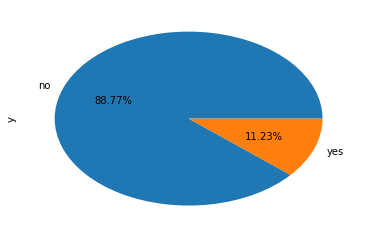

no     32904
yes     4161
Name: y, dtype: int64

In [9]:
# From the original 37069 records, we found there are 11.23% of customers 
# Do Deposition in ANK after visited.(yes)
df['y'].value_counts().plot.pie(autopct = '%1.2f%%')
plt.show()
df['y'].value_counts()

In [10]:
# Map the Dependent-variable (yes or no) to a Dummy-variable (0 or 1).
df.loc[df["y"] == "no", "y"] = 0
df.loc[df["y"] == "yes", "y"] = 1
y = pd.get_dummies(df['y'], columns=['y'], prefix=['y'], drop_first=True)

In [11]:
# For numerical data, the index of results includes counts, mean values, 
# standard deviations, minimum values, three percentiles and maximum values.
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,37065.000000,37065.000000,37065.000000,37065.000000,37065.000000,37065.000000,37065.000000,37065.000000,37065.000000,37065.000000,37065.000000
mean,40.043194,258.402752,2.573317,962.539485,0.172589,0.082798,93.575123,-40.502045,3.622421,5167.152197,0.112262
std,10.395568,260.203215,2.786716,186.750337,0.494055,1.571270,0.579307,4.630332,1.733882,72.170276,0.315693
min,17.000000,1.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [12]:
# For object and bool data, the automatically calculated fields are count (non-null value)
# ,unique (unique value), top (highest frequency) and freq (highest frequency).
df.describe(include=['object', 'bool'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,37065,37065,37065,37065,37065,37065,37065,37065,37065,37065
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,9379,22423,10930,29297,19444,30591,23503,12349,7757,32014


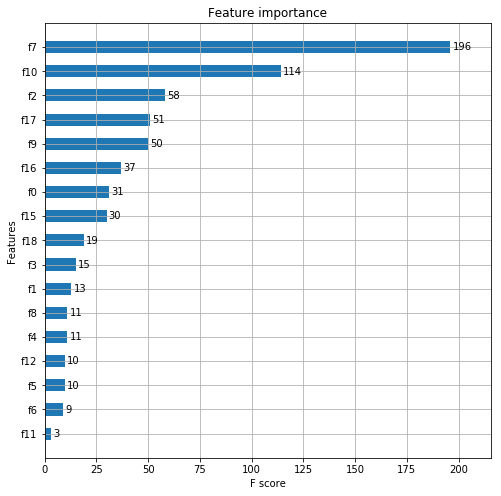

f7 : contact
f10: duration


In [13]:
# We rank the Feature importances ,use anther way, from high to low, and we see that f7(contact), f10(duration) and f2(marital) are the 
# three most important factors.
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# load data
dataset_z = loadtxt('bank_intx.csv', delimiter=",")
# split data into X and y
X1 = dataset_z[:,0:19]
y1 = dataset_z[:,20]
# fit model no training data
model2 = XGBClassifier()
model2.fit(X1, y1)
# plot feature importance
fig2,ax = plt.subplots(figsize=(8,8))
plot_importance(model2,height=0.5,ax=ax,max_num_features=64)
#plot_importance(model)
plt.show()
print("f7 : contact")
print("f10: duration")

In [14]:
# In order to better analyze the data, we separately extract the data of 0~7 rows 
# in the dataset, which constitutes a sub-dataset of customer information.
bank_client = df.iloc[:, 0:7]

In [15]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,32,management,married,professional.course,unknown,no,no
1,41,admin.,married,high.school,no,yes,yes
2,32,admin.,married,university.degree,no,yes,no
3,37,admin.,married,high.school,no,unknown,unknown
4,38,admin.,divorced,university.degree,no,no,no


In [16]:
# Understanding classification variables.
print('job:\n', bank_client['job'].unique())
print('marital\n', bank_client['marital'].unique())
print('education\n', bank_client['education'].unique())
print('default\n', bank_client['default'].unique())
print('housing\n', bank_client['housing'].unique())
print('loan\n', bank_client['loan'].unique())

job:
 ['management' 'admin.' 'blue-collar' 'services' 'technician' 'retired'
 'unemployed' 'housemaid' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
 ['married' 'divorced' 'single' 'unknown']
education
 ['professional.course' 'high.school' 'university.degree' 'basic.9y'
 'basic.4y' 'unknown' 'basic.6y' 'illiterate']
default
 ['unknown' 'no' 'yes']
housing
 ['no' 'yes' 'unknown']
loan
 ['no' 'yes' 'unknown']


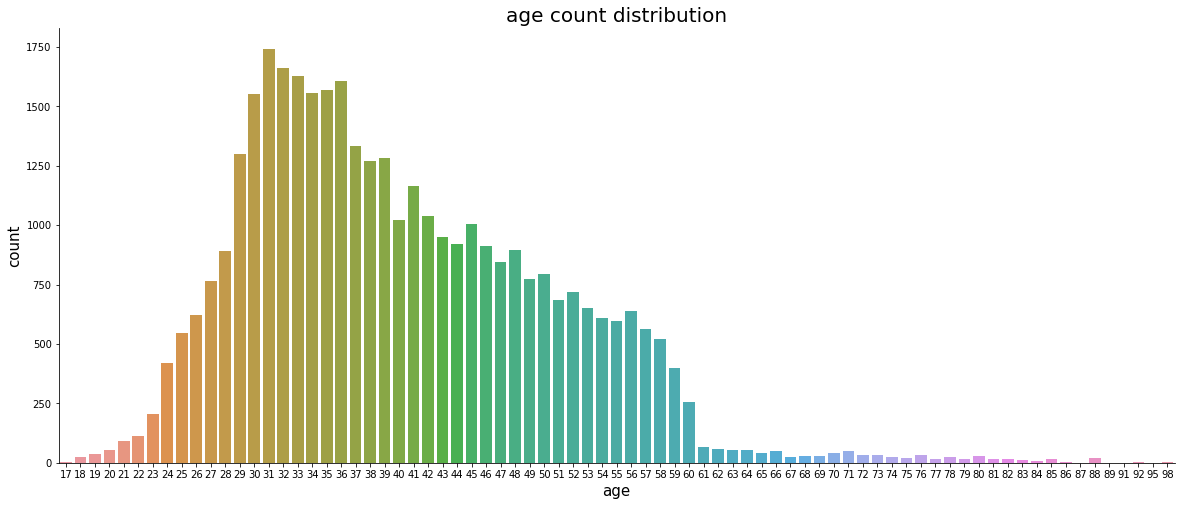

In [17]:
# The age distribution of the sample dataset.
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x='age', data=bank_client)
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('age count distribution', fontsize=20)
sns.despine()

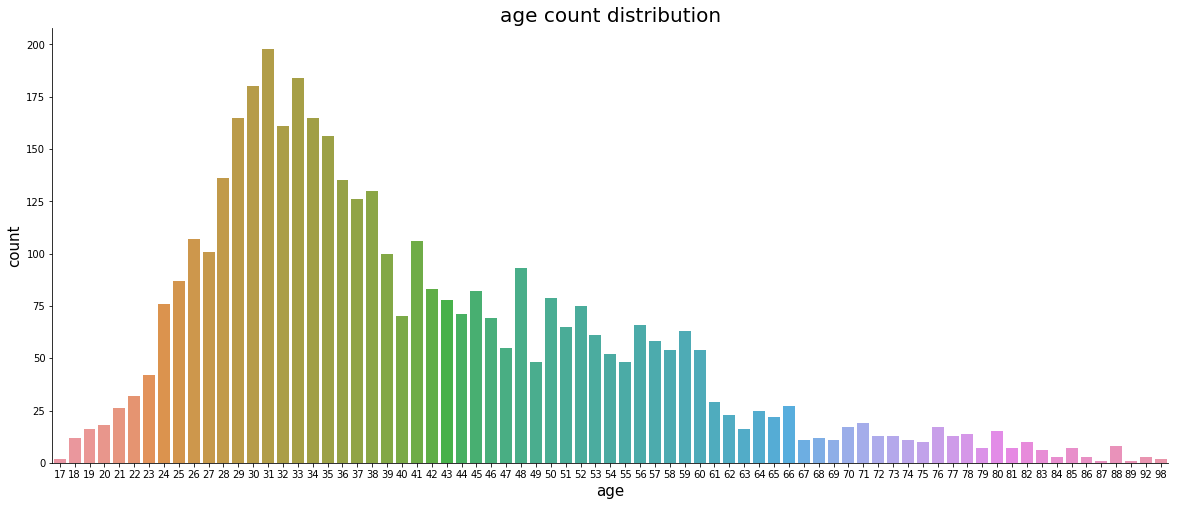

In [18]:
# From the age distribution of "time deposit", it can be seen that the age distribution 
# of people who will deposit is mainly between 24~60 years old.
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x='age', data=df[(df['y'] == 1)])
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('age count distribution', fontsize=20)
sns.despine()

In [21]:
# 继续将DataFrame切片以单独处理，这部分数据与当前活动最后一次联系有关
bank_related = df.iloc[:, 7:11]
bank_related.head()

bank_temp = bank_related.copy()
# duration fields-ranging
def duration(data):
    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180), 'duration'] = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 320), 'duration'] = 3
    data.loc[(data['duration'] > 320) & (data['duration'] <= 647), 'duration'] = 4
    data.loc[data['duration'] > 647, 'duration'] = 5
    return data

duration(bank_temp)

,contact,month,day_of_week,duration
0,cellular,jul,mon,4
1,cellular,apr,mon,5
2,cellular,may,mon,3
3,cellular,jul,thu,1
4,cellular,jul,tue,4
5,telephone,jul,tue,1
6,telephone,may,wed,4
7,telephone,may,thu,3
8,telephone,jun,thu,4
9,cellular,nov,wed,4


<Figure size 432x288 with 0 Axes>

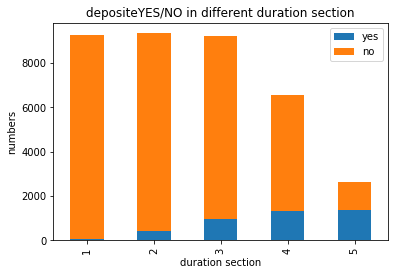

'YES in duration'    percentage/%

1     0.850835
2     4.583423
3    10.472056
4    20.310361
5    51.017332
Name: duration, dtype: float64
                                     >648: 5


In [22]:
# The picture below says that in different occupations, the ratio costumers choose to between saving and not saving
fig = plt.figure()
fig.set(alpha=0.2)

y_0 = bank_temp.duration[df.y == 0].value_counts()
y_1 = bank_temp.duration[df.y == 1].value_counts()
df_a = pd.DataFrame({u'yes': y_1, u'no': y_0})
df_a.plot(kind='bar', stacked=True)
plt.title(u"depositeYES/NO in different duration section")
plt.xlabel(u"duration section")
plt.ylabel(u"numbers")
plt.show()
#The chart below reflects that different duration section have the different ratio of Do or Not Depostion in ANZ.

print("'YES in duration'    percentage/%")
print("")
yes_in_duration = y_1 / (bank_temp.duration.value_counts()) * 100
print(yes_in_duration)
print("                                     >648: 5")
# The ratio of costomers in different jobs that Do Depostion in the end.
# And the graph told us that "retired" and "student" are the highest two groups that Do Depostion in ANZ.


<Figure size 432x288 with 0 Axes>

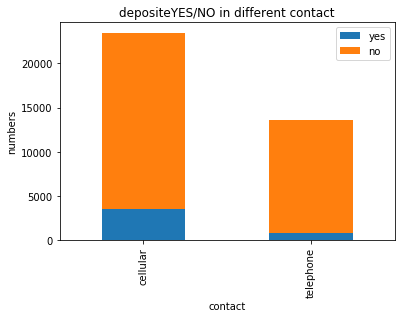

'YES in contact'    percentage/%

cellular     14.674722
telephone     5.249963
Name: contact, dtype: float64


In [23]:
# The picture below says that in different occupations, the ratio costumers choose to between saving and not saving
fig = plt.figure()
fig.set(alpha=0.2)
 
y_0 = bank_temp.contact[df.y == 0].value_counts()
y_1 = bank_temp.contact[df.y == 1].value_counts()
df_a = pd.DataFrame({u'yes': y_1, u'no': y_0})
df_a.plot(kind='bar', stacked=True)
plt.title(u"depositeYES/NO in different contact")
plt.xlabel(u"contact")
plt.ylabel(u"numbers")
plt.show()
#The chart below reflects that different duration section have the different ratio of Do or Not Depostion in ANZ.

print("'YES in contact'    percentage/%")
print("")
yes_in_contact = y_1 / (bank_temp.contact.value_counts()) * 100
print(yes_in_contact)
# The ratio of costomers in different jobs that Do Depostion in the end.
# And the graph told us that "retired" and "student" are the highest two groups that Do Depostion in ANZ.


<Figure size 432x288 with 0 Axes>

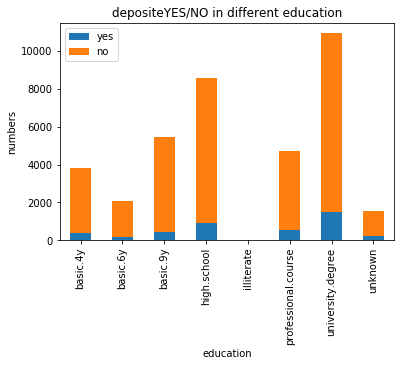

'YES in jobs'    percentage/%
basic.4y               10.052770
basic.6y                8.349515
basic.9y                8.001468
high.school            10.637054
illiterate             25.000000
professional.course    11.403695
university.degree      13.594365
unknown                15.073765
Name: education, dtype: float64


In [24]:
# The picture below says that in different education-level, the ratio costumers choose to between 
# saving and not saving
fig_a = plt.figure()
fig_a.set(alpha=0.2)
 
y_0 = bank.education[bank.y == 'no'].value_counts()
y_1 = bank.education[bank.y == 'yes'].value_counts()
df_a=pd.DataFrame({u'yes':y_1, u'no':y_0})
df_a.plot(kind='bar', stacked=True)
plt.title(u"depositeYES/NO in different education")
plt.xlabel(u"education") 
plt.ylabel(u"numbers") 
plt.show()
#The chart below reflects that different education have the different ratio of Do or Not Depostion in ANK.

print("'YES in jobs'    percentage/%")
yes_in_education = y_1/(bank.education.value_counts())*100
print(yes_in_education)
# The ratio of costomers in different education level that Do Depostion in the end.
# And the graph told us that "single" persons are willing to Do Depostion in ANK.

<Figure size 432x288 with 0 Axes>

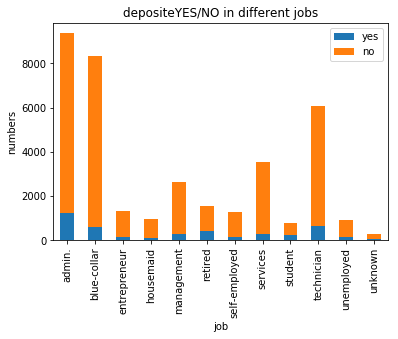

'YES in jobs'    percentage/%

admin.           13.017058
blue-collar       6.913936
entrepreneur      8.754717
housemaid        10.134436
management       11.111111
retired          25.716146
self-employed    10.031348
services          7.936955
student          31.619537
technician       10.617284
unemployed       13.686534
unknown          12.162162
Name: job, dtype: float64


In [25]:
# The picture below says that in different occupations, the ratio costumers choose to between saving and not saving
fig_a = plt.figure()
fig_a.set(alpha=0.2)
 
y_0 = bank.job[bank.y == 'no'].value_counts()
y_1 = bank.job[bank.y == 'yes'].value_counts()
df_a=pd.DataFrame({u'yes':y_1, u'no':y_0})
df_a.plot(kind='bar', stacked=True)
plt.title(u"depositeYES/NO in different jobs")
plt.xlabel(u"job") 
plt.ylabel(u"numbers") 
plt.show()
#The chart below reflects that different jobs have the different ratio of Do or Not Depostion in ANK.

print("'YES in jobs'    percentage/%")
print("")
yes_in_jobs = y_1/(bank.job.value_counts())*100
print(yes_in_jobs)
# The ratio of costomers in different jobs that Do Depostion in the end.
# And the graph told us that "retired" and "student" are the highest two groups that Do Depostion in ANK.

<Figure size 432x288 with 0 Axes>

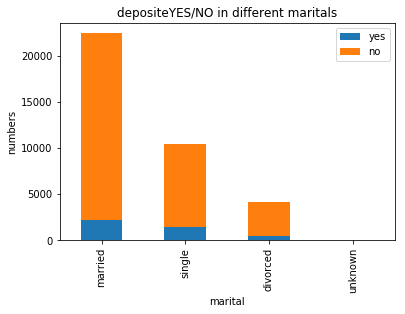

'YES in jobs'    percentage/%
married     10.086507
single      13.986551
divorced    10.363068
unknown     16.216216
Name: marital, dtype: float64


In [26]:
# The picture below says that in different marital, the ratio costumers choose to between saving and not saving
fig_a = plt.figure()
fig_a.set(alpha=0.2)
 
y_0 = bank.marital[bank.y == 'no'].value_counts()
y_1 = bank.marital[bank.y == 'yes'].value_counts()
df_a=pd.DataFrame({u'yes':y_1, u'no':y_0})
df_a.plot(kind='bar', stacked=True)
plt.title(u"depositeYES/NO in different maritals")
plt.xlabel(u"marital") 
plt.ylabel(u"numbers") 
plt.show()
#The chart below reflects that different jobs have the different ratio of Do or Not Depostion in ANK.

print("'YES in jobs'    percentage/%")
yes_in_maritals = y_1/(bank.marital.value_counts())*100
print(yes_in_maritals)
# The ratio of costomers in different marital situation that Do Depostion in the end.
# And the graph told us that "single" persons are willing to Do Depostion in ANK.

In [27]:
#yes or no
df['y'].value_counts()

0    32904
1     4161
Name: y, dtype: int64

#异常值（离群点）

#计算离群值:
  # 四分位差, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    #这是统计中用于检测异常值的标准方法. 如果我们对数据列表进行排序并将其分成4份，那么中间点称为中值。
    #The mark at 25th percentile is our Q1 and the mark at 75th percentile is our Q3. IQR is the range of difference between Q3 and Q1.
#IQR = Q3 - Q1
#The 1.5*IQR range below Q1 is lower bound and 1.5*IQR range
#above Q3 is upper bound for outlier detection. 
#所有在下界下方和上界上方的点都是离群点。
#This concept of IQR and outlier detection

In [28]:
print('1st Quartile: ', bank_client['age'].quantile(q=0.25))
print('2nd Quartile:', bank_client['age'].quantile(q=0.50))
print('3rd Qartile:', bank_client['age'].quantile(q=0.75))
print('4th Quartile:', bank_client['age'].quantile(q=1.0))

print('Age above: ', bank_client['age'].quantile(q=0.75) + 1.5 * (
        bank_client['age'].quantile(q=0.75) - bank_client['age'].quantile(q=0.25)), 'are outliers')


1st Quartile:  32.0
2nd Quartile: 38.0
3rd Qartile: 47.0
4th Quartile: 98.0
Age above:  69.5 are outliers


In [29]:
#age离群值所占的比例
print('Numerber of outliers: ', bank_client[bank_client['age'] > 69.6]['age'].count())
print('Number of clients: ', len(bank_client))
#Outliers in %
print('Outliers are:', round(bank_client[bank_client['age'] > 69.6]['age'].count() * 100 / len(bank_client), 2), '%')


Numerber of outliers:  419
Number of clients:  37065
Outliers are: 1.13 %


In [30]:
# The mean value of the age.
print('MEAN:', round(bank_client['age'].mean(), 1))


MEAN: 40.0


In [31]:
# 低标准偏差表示数据点趋向于接近平均值或期望值
# A high standard deviation indicates that the data points are scattered
print('STD :', round(bank_client['age'].std(), 1))
#  (coefficient variation) (STD/MEAN)*100，变差系数
#    cv < 15%, low dispersion（散布）
#    cv > 30%, high dispersion
print('CV  :', round(bank_client['age'].std() * 100 / bank_client['age'].mean(), 1), ', High middle dispersion')

STD : 10.4
CV  : 26.0 , High middle dispersion


jobs

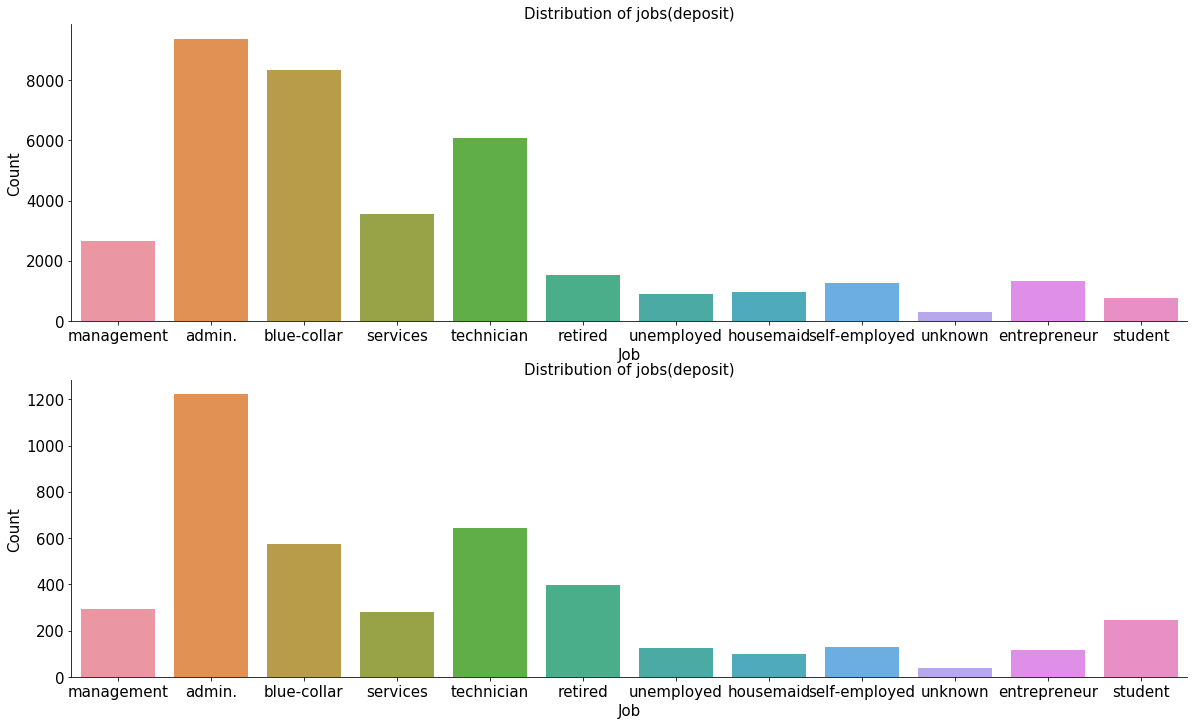

In [32]:
# 查看这家银行会定期存款的客户都是做什么的
#可以看出会存款的人主要职位admin、technical、blue-collar
#两种分布基本一致
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))
sns.countplot(x='job', data=bank_client, ax=ax1,
              order=['management', 'admin.', 'blue-collar', 'services', 'technician', 'retired',
                     'unemployed', 'housemaid', 'self-employed', 'unknown', 'entrepreneur', 'student'])
ax1.set_xlabel('Job', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.set_title('Distribution of jobs(deposit)', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x='job', data=bank_client[df['y'] == 1], ax=ax2,
              order=['management', 'admin.', 'blue-collar', 'services', 'technician', 'retired', 'unemployed',
                     'housemaid', 'self-employed', 'unknown', 'entrepreneur', 'student'])
ax2.set_xlabel('Job', fontsize=15)
ax2.set_ylabel('Count', fontsize=15)
ax2.set_title('Distribution of jobs(deposit)', fontsize=15)
ax2.tick_params(labelsize=15)

sns.despine()


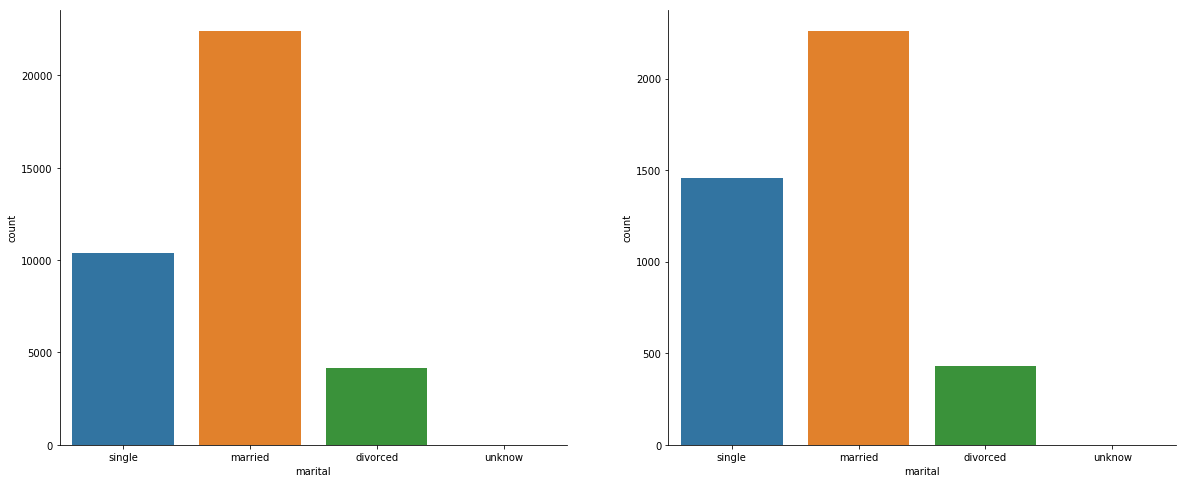

In [33]:
#所有客户以及会定期存款的人的婚姻情况数据分布
#可以发现两种情况下的分布基本一致，会存款的人最多的是已经结婚的人
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sns.countplot(x='marital', data=bank_client, ax=ax1, order=['single', 'married', 'divorced', 'unknow'])
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.countplot(x='marital', data=bank_client[df['y'] == 1], ax=ax2, order=['single', 'married', 'divorced', 'unknow'])
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

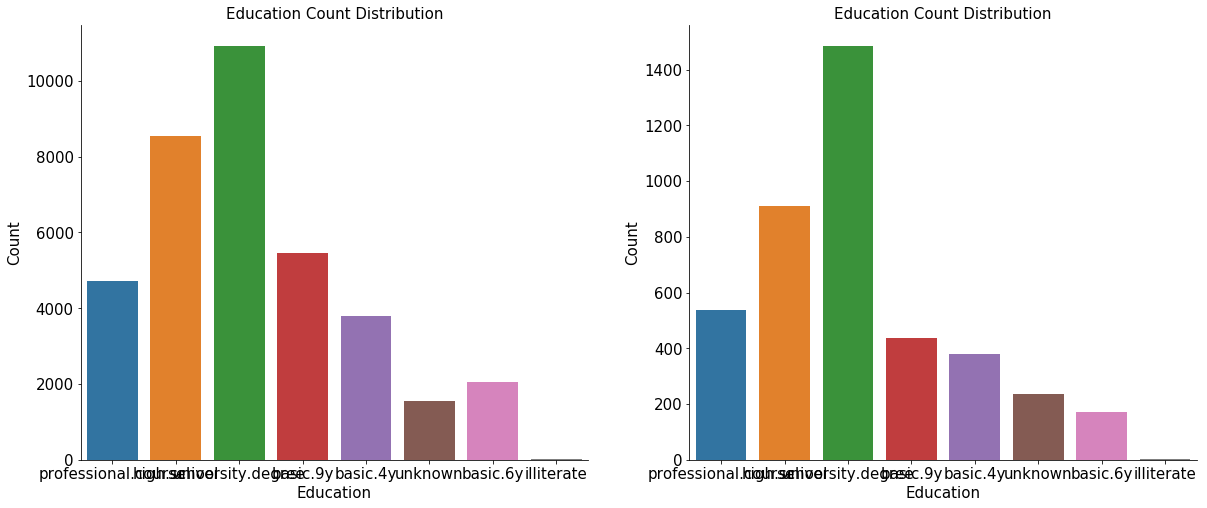

In [34]:
#所有客户以及会定期存款的人受教育水平数据分布
#可以发现两种情况下的分布基本一致，会存款的人最多的是大学学历的人
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sns.countplot(x='education', data=bank_client, ax=ax1,
              order=['professional.course', 'high.school', 'university.degree', 'basic.9y',
                     'basic.4y', 'unknown', 'basic.6y', 'illiterate'])
ax1.set_xlabel('Education', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.set_title('Education Count Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x='education', data=bank_client[df['y'] == 1], ax=ax2,
              order=['professional.course', 'high.school', 'university.degree', 'basic.9y',
                     'basic.4y', 'unknown', 'basic.6y', 'illiterate'])
ax2.set_xlabel('Education', fontsize=15)
ax2.set_ylabel('Count', fontsize=15)
ax2.set_title('Education Count Distribution', fontsize=15)
ax2.tick_params(labelsize=15)
sns.despine()

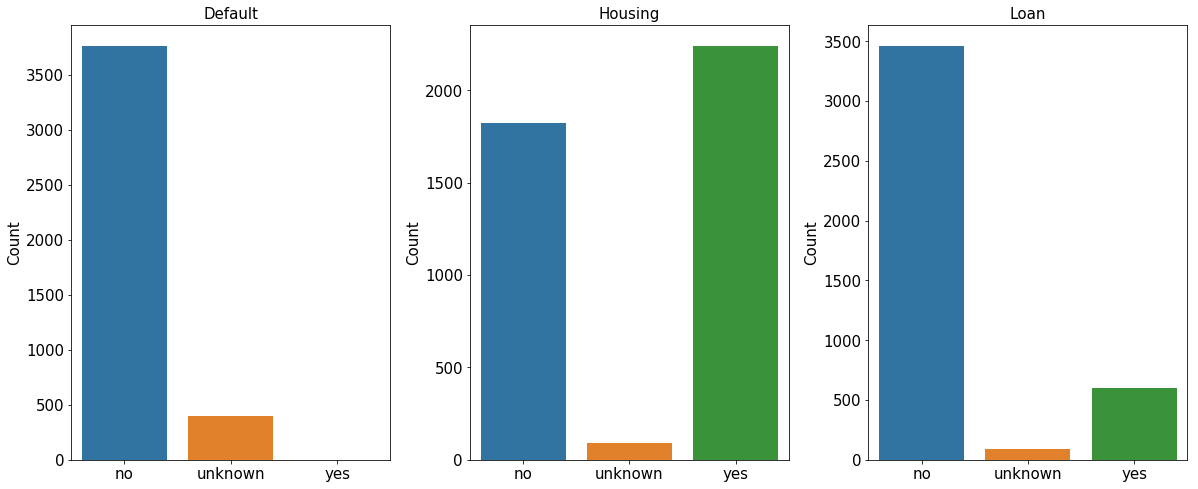

In [35]:
# 查看会存款的客户的信用情况、房贷、个人贷款的分布情况
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
sns.countplot(x='default', data=bank_client[df['y'] == 1], ax=ax1, order=['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing
sns.countplot(x='housing', data=bank_client[df['y'] == 1], ax=ax2, order=['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan
sns.countplot(x='loan', data=bank_client[df['y'] == 1], ax=ax3, order=['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [37]:
# 银行客户数据的离散列值转换为连续值
# 标签编码顺序按照字母顺序排列
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
bank_client['job'] = labelencoder_X.fit_transform(bank_client['job'])
bank_client['marital'] = labelencoder_X.fit_transform(bank_client['marital'])
bank_client['education'] = labelencoder_X.fit_transform(bank_client['education'])
bank_client['default'] = labelencoder_X.fit_transform(bank_client['default'])
bank_client['housing'] = labelencoder_X.fit_transform(bank_client['housing'])
bank_client['loan'] = labelencoder_X.fit_transform(bank_client['loan'])

In [38]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,32,4,1,5,1,0,0
1,41,0,1,3,0,2,2
2,32,0,1,6,0,2,0
3,37,0,1,3,0,1,1
4,38,0,0,6,0,0,0


In [40]:
print("Kind of Contact: \n", bank_related['contact'].unique())
print("\nWhich monthis this campaing work: \n", bank_related['month'].unique())
print("\nWhich days of week this campaing work: \n", bank_related['day_of_week'].unique())

Kind of Contact: 
 ['cellular' 'telephone']

Which monthis this campaing work: 
 ['jul' 'apr' 'may' 'jun' 'nov' 'aug' 'oct' 'sep' 'dec' 'mar']

Which days of week this campaing work: 
 ['mon' 'thu' 'tue' 'wed' 'fri']


In [41]:
# 将通话时间的单位转化成分钟
print("Max duration  call in minutes:  ", round((bank_related['duration'].max() / 60), 1))
print("Min duration  call in minutes:   ", round((bank_related['duration'].min() / 60), 1))
print("Mean duration call in minutes:   ", round((bank_related['duration'].mean() / 60), 1))
print("STD duration  call in minutes:   ", round((bank_related['duration'].std() / 60), 1))
# Std close to the mean means that the data values are close to the mean

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


In [42]:
# Quartiles（四分位数）
print('1º Quartile: ', bank_related['duration'].quantile(q=0.25))
print('2º Quartile: ', bank_related['duration'].quantile(q=0.50))
print('3º Quartile: ', bank_related['duration'].quantile(q=0.75))
print('4º Quartile: ', bank_related['duration'].quantile(q=1.00))
#Calculate the outliers:
# Interquartile range, IQR = Q3 - Q1
# lower 1.5*IQR whisker = Q1 - 1.5 * IQR
# Upper 1.5*IQR whisker = Q3 + 1.5 * IQR9

print('Duration calls above: ', bank_related['duration'].quantile(q=0.75) +
      1.5 * (bank_related['duration'].quantile(q=0.75) - bank_related['duration'].quantile(q=0.25)), 'are outliers')

1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  320.0
4º Quartile:  4918.0
Duration calls above:  647.0 are outliers


In [43]:
# 通话时间离群值所占比例
print('Numerber of outliers: ', bank_related[bank_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(bank_related))
#Outliers in %
print('Outliers are:',
      round(bank_related[bank_related['duration'] > 644.5]['duration'].count() * 100 / len(bank_related), 2), '%')


Numerber of outliers:  2674
Number of clients:  37065
Outliers are: 7.21 %


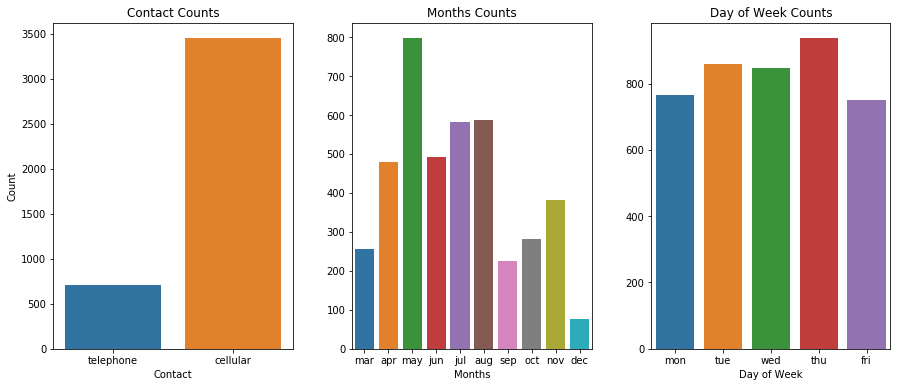

In [44]:
#Contact
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
sns.countplot(bank_related['contact'][df['y'] == 1], ax=ax1)
ax1.set_xlabel('Contact', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)
#Months
sns.countplot(bank_related['month'][df['y'] == 1], ax=ax2,
              order=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize=10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)
#day_of_week
sns.countplot(bank_related['day_of_week'][df['y'] == 1], ax=ax3, order=['mon', 'tue', 'wed', 'thu', 'fri'])
ax3.set_xlabel('Day of Week', fontsize=10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)
plt.subplots_adjust(wspace=0.25)

In [45]:
bank_related[bank_related['duration'] > 640].count()

contact        2713
month          2713
day_of_week    2713
duration       2713
dtype: int64

In [46]:
# 对标签值进行编码
# 标签编码器顺序是按字母顺序排列
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
bank_related['contact'] = labelencoder_X.fit_transform(bank_related['contact'])
bank_related['month'] = labelencoder_X.fit_transform(bank_related['month'])
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week'])

In [47]:
bank_related.head()

,contact,month,day_of_week,duration
0,0,3,1,565
1,0,0,1,982
2,0,6,1,188
3,0,3,2,56
4,0,3,3,419


In [48]:
# 社会和经济背景数据切片
bank_se = df.loc[:, ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.4,93.918,-42.7,4.962,5228.1
1,-1.8,93.075,-47.1,1.405,5099.1
2,-1.8,92.893,-46.2,1.299,5099.1
3,1.4,93.918,-42.7,4.968,5228.1
4,1.4,93.918,-42.7,4.961,5228.1


In [49]:
# 其它特征切片
bank_o = df.loc[:, ['campaign', 'pdays', 'previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,4,999,0,nonexistent
1,1,999,0,nonexistent
2,2,999,0,nonexistent
3,3,999,0,nonexistent
4,8,999,0,nonexistent


In [50]:
bank_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [51]:
from sklearn.preprocessing import LabelEncoder

#对poutcome进行编码
labelencoder_X = LabelEncoder()
bank_o['poutcome'] = labelencoder_X.fit_transform(bank_o['poutcome'])
bank_o.head()

,campaign,pdays,previous,poutcome
0,4,999,0,1
1,1,999,0,1
2,2,999,0,1
3,3,999,0,1
4,8,999,0,1


In [54]:
bank_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37065 entries, 0 to 37068
Data columns (total 4 columns):
campaign    37065 non-null int64
pdays       37065 non-null int64
previous    37065 non-null int64
poutcome    37065 non-null int64
dtypes: int64(4)
memory usage: 2.7 MB


In [55]:
bank_final = pd.concat([bank_client, bank_related, bank_se, bank_o], axis=1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                         'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx',
                         'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]

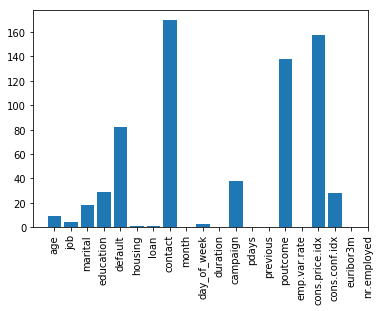

In [56]:
from sklearn.feature_selection import SelectKBest, f_classif

predictors = ["age", "job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week",
              "duration", "campaign", "pdays", "previous", "poutcome", "emp.var.rate", "cons.price.idx",
              "cons.conf.idx", "euribor3m", "nr.employed"]
#predictors = ["age","duration","campaign","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]
selector = SelectKBest(f_classif, k='all')
selector.fit(bank_final[predictors], df["y"])
scores = -np.log10(selector.pvalues_)

# fig, ax = plt.subplots()
# sns.countplot(bank_final[], ax = ax)
# ax1.set_xlabel('Contact', fontsize = 10)
# ax1.set_ylabel('Count', fontsize = 10)
# ax1.set_title('Contact Counts')
# ax1.tick_params(labelsize=10)
#sns.countplot(x='age', data= bank_final)
# ax.set_xlabel('age',fontsize=15)
# ax.set_ylabel('count',fontsize=15)
# ax.set_title('age count distribution',fontsize=10)
# sns.despine()

plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

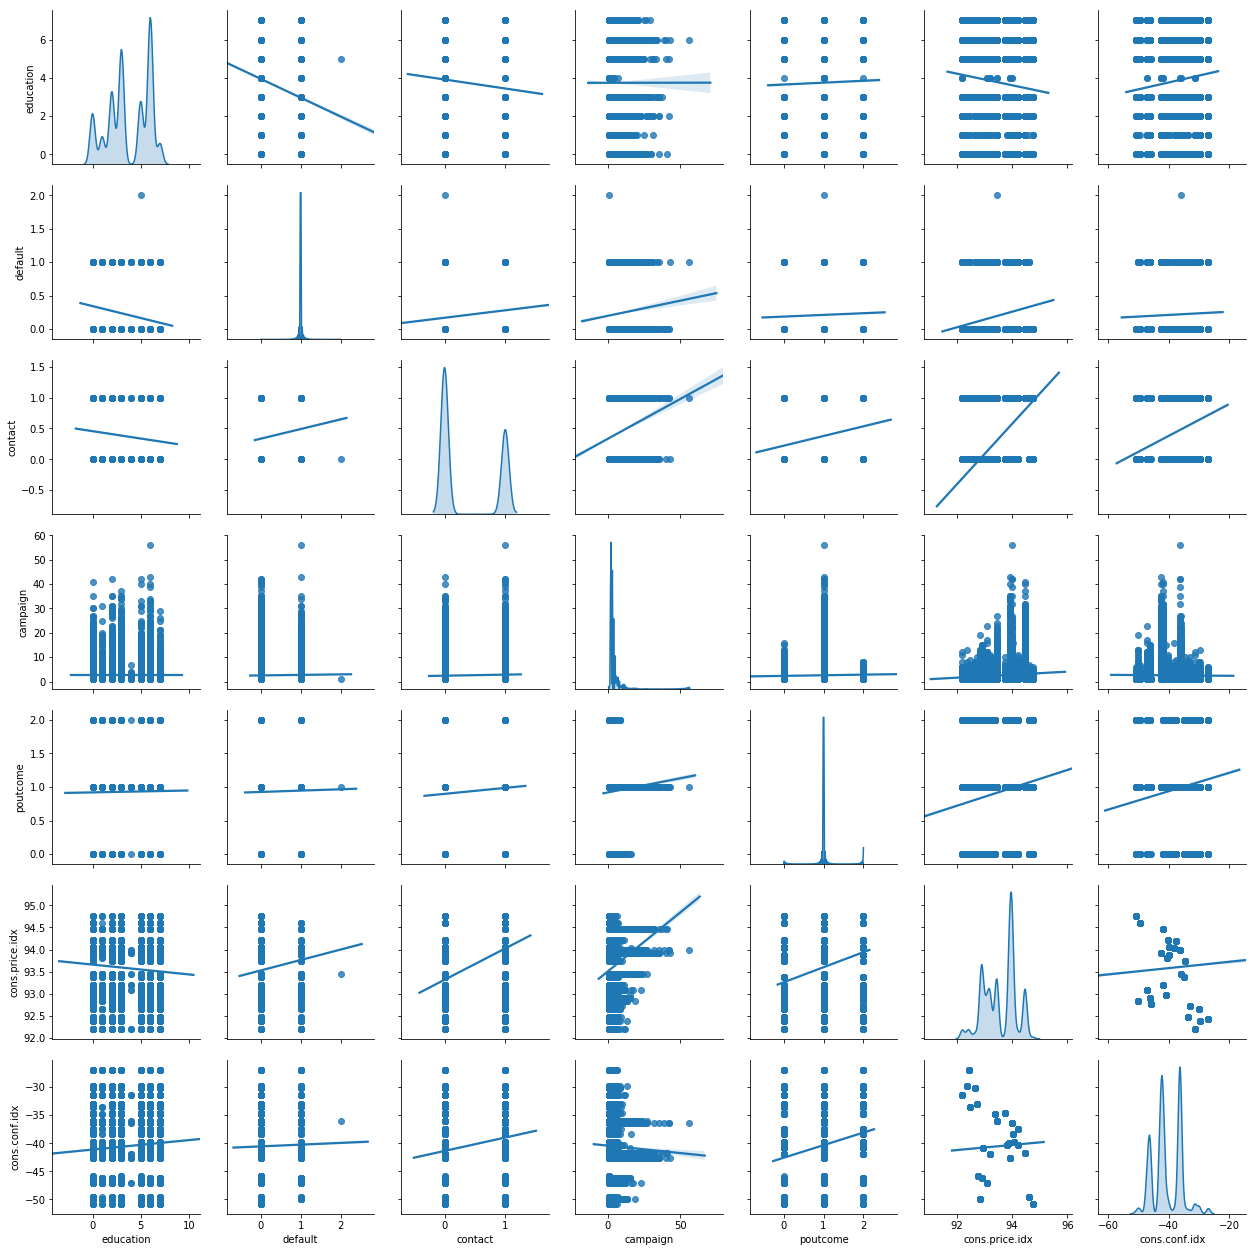

In [57]:
sns.pairplot(bank_final, diag_kind='kde', kind='reg',
             vars=['education', 'default', 'contact', 'campaign', 'poutcome', 'cons.price.idx', 'cons.conf.idx'])

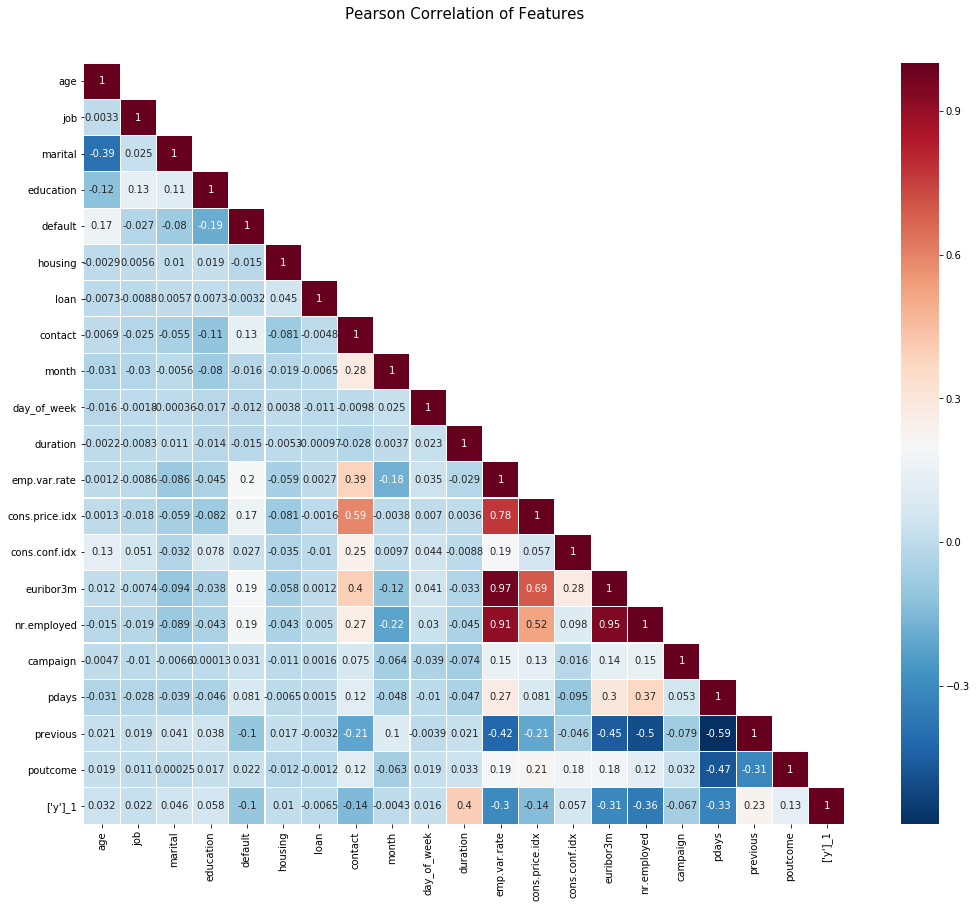

In [58]:
#各特征间的皮尔逊相关系数
#相关系数分类（负数同理）
#0.8-1.0 极强相关
#0.6-0.8 强相关
#0.4-0.6 中等程度相关
#0.2-0.4 弱相关
#0.0-0.2 极弱相关或无相关
cor_mat = pd.concat([bank_final, y], axis=1).corr()
#colormap = plt.cm.viridis
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=(20, 14))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data=cor_mat, linewidths=0.1, cmap='RdBu_r', vmax=1.0, mask=mask, square=True, linecolor='white',
            annot=True, cbar=True)

In [59]:
#根据上面的皮尔逊相关系数，对不同特征之间相关性极强或强的特征进行一些剔除
#因为它们关联性越强越（即越线性相关），越可以看成一个特征

bank_final.drop(['emp.var.rate','cons.price.idx'], axis=1, inplace=True)
bank_final.shape

(37065, 18)

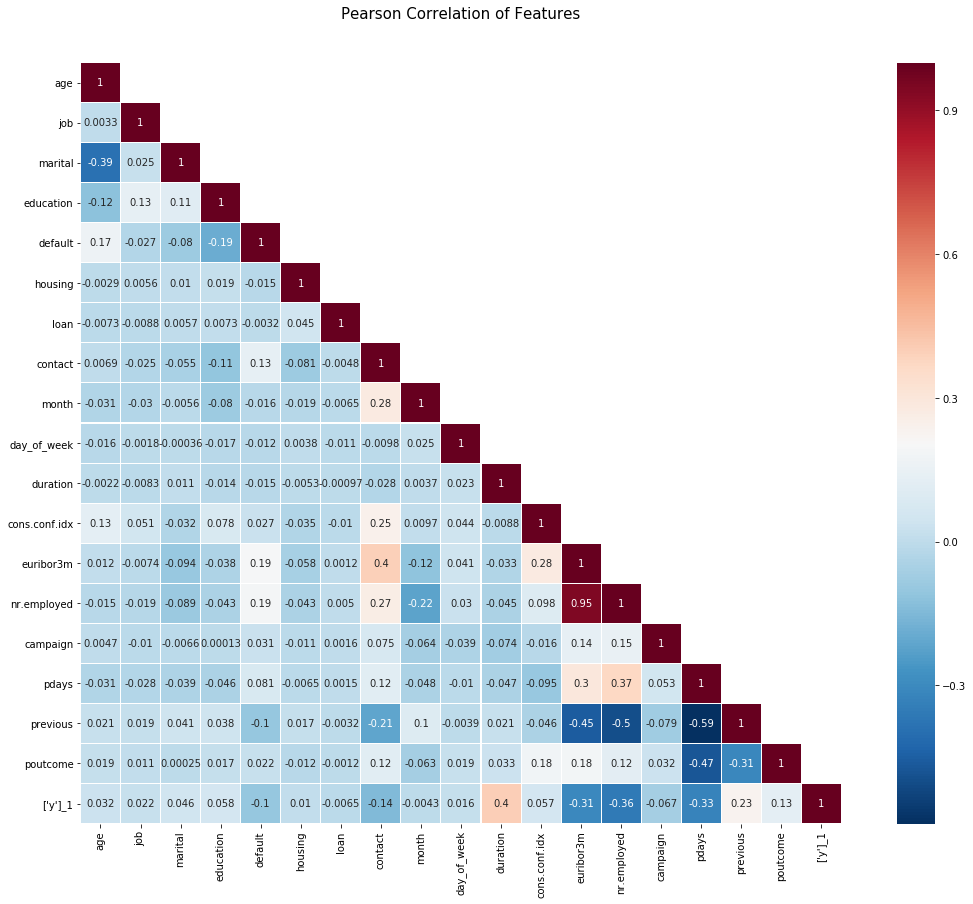

In [60]:
#再次观察经过处理后的皮尔逊相关系数
#发现已经没有某两个特征之间有极强相关或者强相关的情况

cor_mat = pd.concat([bank_final, y], axis=1).corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=(20, 14))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data=cor_mat, linewidths=0.1, cmap='RdBu_r', vmax=1.0, mask=mask, square=True, linecolor='white',
            annot=True, cbar=True)

In [61]:
print(type(bank_final), type(y))
#将DataFrame类型转换成ndarray类型
X_final = bank_final.values
y_final = y.values
print(type(X_final), type(y_final))
print(X_final.shape)
print(y_final.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(37065, 18)
(37065, 1)


# Part 2: modelling/algorithm development

In [62]:
# Model-Merging
import numpy as np
from __future__ import division
from sklearn.cross_validation import train_test_split
#from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost.sklearn import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

#from xgboost import XGBClassifier

np.random.seed(0)  # seed to shuffle the train set
n_folds = 10
verbose = True
shuffle = False
#划分数据集
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, random_state=0, test_size=0.2)
#特征缩放
sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)
#打印个集类型
print(type(X_train), type(y_train), type(X_test), type(y_test))

if shuffle:
    idx = np.random.permutation(y_train.size)
    X_train = X_train[idx]
    y_train = y_train[idx]

clfs = [LogisticRegression(random_state=1),
        RandomForestClassifier(n_estimators=100, n_jobs=-1, criterion='entropy'),
        #AdaBoostClassifier(n_estimators=500, learning_rate=0.1),
        #ExtraTreesClassifier(n_estimators=500, n_jobs=-1, criterion='gini'),
        #KNeighborsClassifier(n_neighbors=2),
        #SVC(kernel='linear', C=0.025),
        #ExtraTreesClassifier(n_estimators=100, n_jobs=-1, criterion='entropy'),
        #XGBClassifier(n_estimators=100, max_depth=6, min_child_weight=2, gamma=0.9, subsample=0.8),
        #xgb.XGBClassifier(learning_rate=0.1,n_estimators=100,max_depth=5,min_child_weight=1,subsample=0.8,
        #                  colsample_bytree=0.8,gamma=0,reg_alpha=0,reg_lambda=1),
        #lgb.LGBMClassifier(boosting_type='gbdt',num_leaves=31,max_depth=7,learning_rate=0.05,subsample_for_bin=5000),
        GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=100)]

print("Creating train and test sets for stacking.")
dataset_blend_train = np.zeros((X_train.shape[0], len(clfs)))  #训练集样本个数（行），融合算法个数（列）
#dataset_blend_test = np.zeros((X_test.shape[0], len(clfs)))  #测试集样本个数（行），融合算法个数（列）----------
dataset_blend_test = np.zeros((bank_final[24837:].shape[0], len(clfs)))  #测试集样本个数（行），融合算法个数（列）
kf = list(KFold(y_train.shape[0], n_folds, random_state=100))
#print("kf = ",kf) # 查看格式

for j, clf in enumerate(clfs):
    print(j + 1, clf)
    #dataset_blend_test_j = np.zeros((X_test.shape[0], n_folds))  #------------------测试集样本个数（行），交叉验证折数（列）
    dataset_blend_test_j = np.zeros((bank_final[24837:].shape[0], n_folds))  #测试集样本个数（行），交叉验证折数（列）
    for i, (train, test) in enumerate(kf):
        print("Fold", i, end='\t')
        X_train_b = X_train[train]
        y_train_b = y_train[train]
        X_test_b = X_train[test]
        y_test_b = y_train[test]
        clf.fit(X_train_b, y_train_b)
        y_submission = clf.predict_proba(X_test_b)[:, 1] # loss_predict[]
        # print("clf.predict_proba(X_test_b):",clf.predict_proba(X_test_b))
        # print("y_submission:",y_submission)
        
        dataset_blend_train[test, j] = y_submission
        #print("dataset_blend_train",dataset_blend_train)
        #dataset_blend_test_j[:, i] = clf.predict_proba(X_test)[:, 1] # "dataset_blend_test_j" is based on[0.2-testsets :10kf] for loss_predict
    #print()----------------------
        dataset_blend_test_j[:, i] = clf.predict_proba(bank_final[24837:])[:, 1] # "dataset_blend_test_j" is based on[0.2-testsets :10kf] for loss_predict
    print()
    dataset_blend_test[:, j] = dataset_blend_test_j.mean(1)  # "dataset_blend_test" is the mean_loss of 20%testsets in clfs-alogrithms.[20%:clfs]

n = 1
for model in clfs:
    model.fit(X_train, y_train)
    #y_test_pred = model.predict(X_test)-------------
    y_test_pred = model.predict(bank_final[24837:])
    #print("Model %d, Accuracy %0.6f." % (n, accuracy_score(y_test, y_test_pred)))------------------
    print("Model %d, Accuracy %0.6f." % (n, accuracy_score(y_final[24837:], y_test_pred)))
    n = n + 1

print("Stacking.")
logmodel = GradientBoostingClassifier()
logmodel.fit(dataset_blend_train, y_train)
#logmodel.fit(X_train, y_train)-------------------------------
#y_score = logmodel.predict(X_test)------------------------------
y_score = logmodel.predict(dataset_blend_test)
#print("Stacking Accuracy %0.6f." % accuracy_score(y_test, y_score))-------------------

print("Stacking Accuracy %0.6f." % accuracy_score(y_final[24837:], y_score))

C:\Anaconda3.7\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda3.7\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Creating train and test sets for stacking.
1 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Fold 0	Fold 1	Fold 2	Fold 3	Fold 4	Fold 5	Fold 6	Fold 7	Fold 8	Fold 9	
2 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Fold 0	Fold 1	Fold 2	Fold 3	Fold 4	Fold 5	Fold 6	Fold 7	Fold 8	Fold 9	
3 GradientBoostingClassifie

In [63]:
# Model-Merging
import numpy as np
from __future__ import division
from sklearn.cross_validation import train_test_split
#from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost.sklearn import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

#from xgboost import XGBClassifier

np.random.seed(0)  # seed to shuffle the train set
n_folds = 10
verbose = True
shuffle = False
#划分数据集
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, random_state=0, test_size=0.2)
#特征缩放
sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)
#打印个集类型
print(type(X_train), type(y_train), type(X_test), type(y_test))

if shuffle:
    idx = np.random.permutation(y_train.size)
    X_train = X_train[idx]
    y_train = y_train[idx]

clfs = [LogisticRegression(random_state=1),
        RandomForestClassifier(n_estimators=100, n_jobs=-1, criterion='entropy'),
        #AdaBoostClassifier(n_estimators=500, learning_rate=0.1),
        #ExtraTreesClassifier(n_estimators=500, n_jobs=-1, criterion='gini'),
        #KNeighborsClassifier(n_neighbors=2),
        #SVC(kernel='linear', C=0.025),
        #ExtraTreesClassifier(n_estimators=100, n_jobs=-1, criterion='entropy'),
        #XGBClassifier(n_estimators=100, max_depth=6, min_child_weight=2, gamma=0.9, subsample=0.8),
        #xgb.XGBClassifier(learning_rate=0.1,n_estimators=100,max_depth=5,min_child_weight=1,subsample=0.8,
        #                  colsample_bytree=0.8,gamma=0,reg_alpha=0,reg_lambda=1),
        #lgb.LGBMClassifier(boosting_type='gbdt',num_leaves=31,max_depth=7,learning_rate=0.05,subsample_for_bin=5000),
        GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=100)]

print("Creating train and test sets for stacking.")
dataset_blend_train = np.zeros((X_train.shape[0], len(clfs)))  #训练集样本个数（行），融合算法个数（列）
dataset_blend_test = np.zeros((X_test.shape[0], len(clfs)))  #测试集样本个数（行），融合算法个数（列）
kf = list(KFold(y_train.shape[0], n_folds, random_state=100))
#print(kf)  查看格式

for j, clf in enumerate(clfs):
    print(j + 1, clf)
    dataset_blend_test_j = np.zeros((X_test.shape[0], n_folds))  #测试集样本个数（行），交叉验证折数（列）
    for i, (train, test) in enumerate(kf):
        print("Fold", i, end='\t')
        X_train_b = X_train[train]
        y_train_b = y_train[train]
        X_test_b = X_train[test]
        y_test_b = y_train[test]
        clf.fit(X_train_b, y_train_b)
        y_submission = clf.predict_proba(X_test_b)[:, 1]
        dataset_blend_train[test, j] = y_submission
        dataset_blend_test_j[:, i] = clf.predict_proba(X_test)[:, 1]
    print()
    dataset_blend_test[:, j] = dataset_blend_test_j.mean(1)

n = 1
for model in clfs:
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    print("Model %d, Accuracy %0.6f." % (n, accuracy_score(y_test, y_test_pred)))
    n = n + 1

print("Stacking.")
logmodel = GradientBoostingClassifier()
#logmodel.fit(dataset_blend_train, y_train)
logmodel.fit(dataset_blend_train, y_train)
y_score = logmodel.predict(dataset_blend_test)
print("Stacking Accuracy %0.6f." % accuracy_score(y_test, y_score))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Creating train and test sets for stacking.
1 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Fold 0	Fold 1	Fold 2	Fold 3	Fold 4	Fold 5	Fold 6	Fold 7	Fold 8	Fold 9	
2 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Fold 0	Fold 1	Fold 2	Fold 3	Fold 4	Fold 5	Fold 6	Fold 7	Fold 8	Fold 9	
3 GradientBoostingClassifie

In [72]:
# ROC CURVE
#Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a worthless test.

#A rough guide for classifying the accuracy of a diagnostic test is the traditional academic point system:

#.90-1 = excellent (A)

#.80-.90 = good (B)

#.70-.80 = fair (C)

#.60-.70 = poor (D)

#.50-.60 = fail (F)


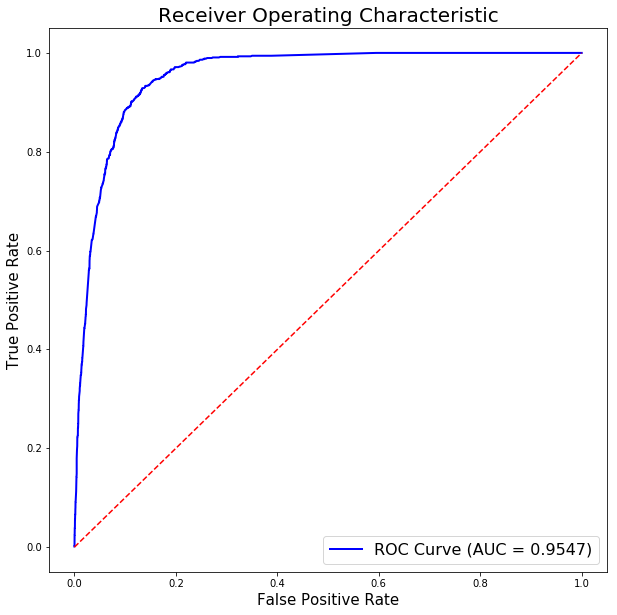

In [66]:
from sklearn.metrics import roc_curve, auc

# The Receiver Operating Characteristic & Area Under the Curve

fig, ax = plt.subplots(figsize=(10, 10))

#用线性回归和上面各模型预测结果（概率矩阵）来预测新的概率结果
probs = logmodel.predict_proba(dataset_blend_test)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)  #计算真正率、假正率
roc_auc = auc(fpr, tpr)  #计算AUC

ax.plot(fpr, tpr, 'b', lw=2, label='ROC Curve (AUC = %0.4f)' % roc_auc)  #假正例率为横坐标，真正例率为纵坐标
ax.plot([0, 1], [0, 1], 'r--')
ax.set_title('Receiver Operating Characteristic', fontsize=20)
ax.set_ylabel('True Positive Rate', fontsize=15)
ax.set_xlabel('False Positive Rate', fontsize=15)
ax.legend(loc='lower right', prop={'size': 16})

In [67]:
# LightGBM
import lightgbm as lgb
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost.sklearn import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

predictors = ["age", "job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week",
              "duration", "campaign", "pdays", "previous", "poutcome", "cons.conf.idx", "euribor3m", "nr.employed"]
alg = lgb.LGBMClassifier(boosting_type='gbdt',num_leaves=31,max_depth=7,learning_rate=0.05,subsample_for_bin=5000)
kf = model_selection.KFold(n_splits=10,shuffle=True,random_state=100)
scores = model_selection.cross_val_score(alg,bank_final[predictors],df["y"],cv=kf)
print(scores.mean())

0.9179277881972686


In [68]:
# Xgboost
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost.sklearn import XGBClassifier

predictors = ["age", "job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week",
              "duration", "campaign", "pdays", "previous", "poutcome", "cons.conf.idx", "euribor3m", "nr.employed"]
alg = xgb.XGBClassifier(learning_rate=0.1,n_estimators=100,max_depth=5,min_child_weight=1,subsample=0.8,colsample_bytree=0.8,
                        gamma=0,reg_alpha=0,reg_lambda=1)
kf = model_selection.KFold(n_splits=10,shuffle=True,random_state=1)
scores = model_selection.cross_val_score(alg,bank_final[predictors],df["y"],cv=kf)
print(scores.mean())

0.9180628719662384


# Part 3: model validation / selected model performance metrics

In [69]:
y_final.shape

(37065, 1)

In [70]:
# From the different 3 ways to build the model, we found that the Model-Merging is the best way to use, then we use this model to test our
# test-dataset.

test_x = bank_final[24837:]
test_data_str = df[24837:].drop(['y'],axis=1)
age = test_data_str['age']
job = test_data_str['job']
marital = test_data_str['marital']
education = test_data_str['education']
default = test_data_str['default']
housing = test_data_str['housing']
loan = test_data_str['loan']
contact = test_data_str['contact']
month = test_data_str['month']
day_of_week = test_data_str['day_of_week']
duration = test_data_str['duration']
campaign = test_data_str['campaign']
pdays = test_data_str['pdays']
#previous = test_data['previous']
poutcome = test_data_str['poutcome']
#emp_var_rate = test_data['emp.var.rate']
#cons_price_idx = test_data['cons.price.idx']
cons_conf_idx = test_data_str['cons.conf.idx']
euribor3m = test_data_str['euribor3m']
#nr_employed = test_data['nr.employed']

predictions = model.predict(test_x)
print(bank_final.shape)

StackingSubmission = pd.DataFrame({ 'predict_y': predictions,
                                   'age': age ,'job':job, 'marital':marital,'education':education,'default':default,
                                   'housing':housing,'loan':loan,'contact':contact,'month':month,'day_of_week':day_of_week,
                                   'duration':duration,'campaign':campaign,'pdays':pdays,
                                   'poutcome':poutcome,
                                   'cons.conf.idx':cons_conf_idx,'euribor3m':euribor3m })

StackingSubmission.to_csv('predict_results.csv', index=True, sep=',')

(37065, 18)


In [71]:
test_x = df[24837:]
predict_file = pd.read_csv("predict_results.csv")

a = test_x['y'].tolist()
b = predict_file['predict_y'].tolist()
target = list(map(lambda x: x[0]-x[1], zip(b, a)))
sum = abs(np.sum(target))
total = len(target)
print("predict_accuracy:",((total-sum)/total)*100,'%')
# 下面结果给出了测试数据集的预测精确性（即用原始数据的一部分作为测试样本，并且与对应的原始数据相同部分的y结果比较得出的值。）

predict_accuracy: 97.54661432777233 %


In [73]:
from sklearn.metrics import classification_report, confusion_matrix

print("混淆矩阵")
#print(confusion_matrix(y_final[24837:], y_score))-------------------------
print(confusion_matrix(y_test, y_score))
#print('Reports\n', classification_report(y_final[24837:], y_score))----------------
print('Reports\n', classification_report(y_test, y_score))

混淆矩阵
[[6345  198]
 [ 361  509]]
Reports
              precision    recall  f1-score   support

          0       0.95      0.97      0.96      6543
          1       0.72      0.59      0.65       870

avg / total       0.92      0.92      0.92      7413

